敘述(statement) --> 不會傳出值
運算式(expression)
https://www.perplexity.ai/search/19ae60c3-b5ed-492c-be69-10220f74dc80

In [7]:
import yfinance as yf
tw2330 = yf.download('2330.tw',start='2024-01-01',end='2024-06-30',auto_adjust=True)
tw2303 = yf.download('2303.tw',start='2024-01-01',end='2024-06-30',auto_adjust=True)
tw2454 = yf.download('2454.tw',start='2024-01-01',end='2024-06-30',auto_adjust=True)
tw2317 = yf.download('2317.tw',start='2024-01-01',end='2024-06-30',auto_adjust=True)
tw2317


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,2317.TW,2317.TW,2317.TW,2317.TW,2317.TW
Date,,,,,
2024-01-02,102.375000,102.375000,101.400000,101.887500,19921105
2024-01-03,101.887505,102.375005,101.400005,101.887505,18957682
2024-01-04,101.400002,102.375002,101.400002,101.887502,15488559
2024-01-05,101.400002,101.887502,101.400002,101.400002,13349572
2024-01-08,98.962502,101.400002,98.962502,100.912502,34642006
...,...,...,...,...,...
2024-06-24,200.850006,204.750006,199.875006,204.262506,104052744
2024-06-25,205.725006,206.700006,195.975006,197.925006,116945868


雙索引：level 由外而內
單索引: 由上而下

In [4]:
tw2330[('Close','2330.TW')]

Date
2024-01-02    593.0
2024-01-03    578.0
2024-01-04    580.0
2024-01-05    576.0
2024-01-08    583.0
              ...  
2024-06-24    940.0
2024-06-25    945.0
2024-06-26    960.0
2024-06-27    960.0
2024-06-28    966.0
Name: (Close, 2330.TW), Length: 117, dtype: float64

In [5]:
tw2330_s = tw2330[('Close','2330.TW')]
tw2303_s = tw2303[('Close','2303.TW')]
tw2454_s = tw2454[('Close','2454.TW')]
tw2317_s = tw2317[('Close','2317.TW')]

In [6]:
import pandas as pd
df_price = pd.DataFrame({'台積電':tw2330_s,'聯電':tw2303_s,'聯發科':tw2454_s,'鴻海':tw2317_s})
df_price

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,593.0,51.900002,915.833130,102.375000
2024-01-03,578.0,50.599998,889.693176,101.887505
2024-01-04,580.0,50.799999,889.309875,101.400002
2024-01-05,576.0,50.799999,882.601685,101.400002
2024-01-08,583.0,50.500000,881.643372,98.962502
...,...,...,...,...
2024-06-24,940.0,56.799999,1351.214233,200.850006
2024-06-25,945.0,56.400002,1327.256592,205.725006
2024-06-26,960.0,56.599998,1346.422852,204.750000


In [14]:
# matrix (矩陣) --> 二維陣列
# 欄位和索引一樣數值, 一樣的名稱
df_price.corr()
df_matrix = df_price.corr()

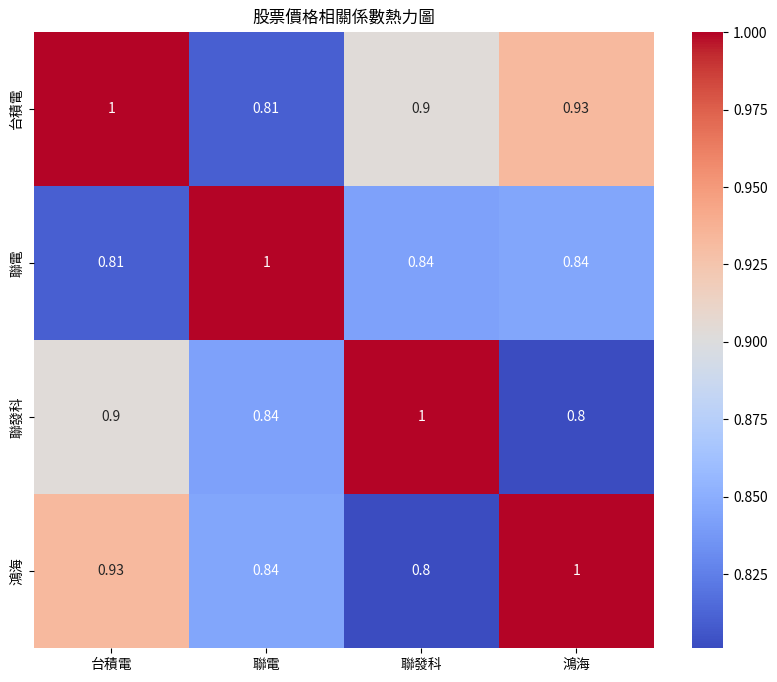

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family='ChineseFont')

figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1,1,1)
sns.heatmap(df_matrix, annot=True, cmap='coolwarm',axes=axes)
axes.set_title('股票價格相關係數熱力圖')
plt.show()

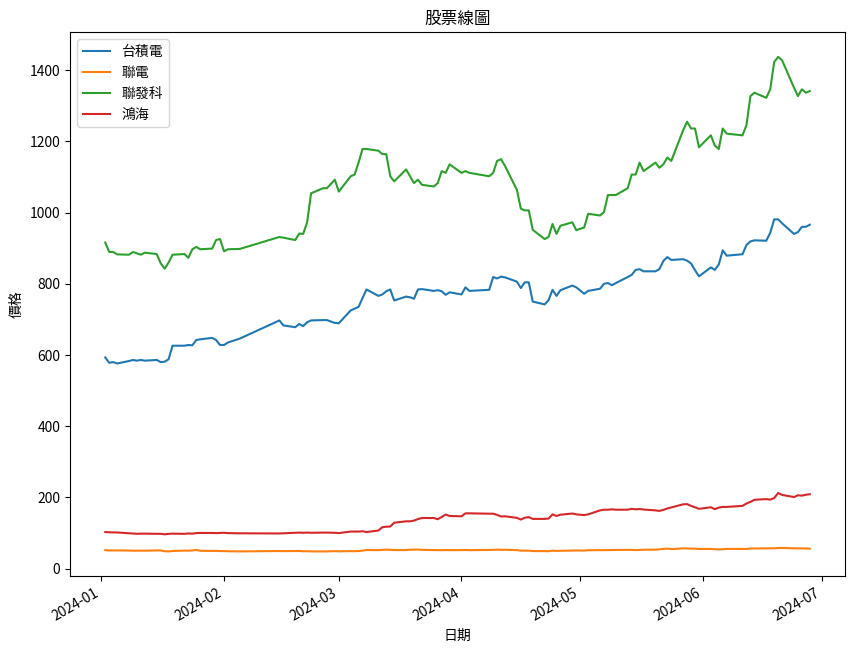

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family='ChineseFont')

figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1,1,1)
df_price.plot(title='股票線圖', xlabel='日期', ylabel='價格', ax=axes)
plt.show()


# matplotlib.pyplot as plt：Matplotlib 的繪圖子模組，常用於繪製各種圖表。
# seaborn as sns：Seaborn 是基於 Matplotlib 的高階視覺化套件，讓圖表更美觀。
# matplotlib as mpl：匯入 Matplotlib 主套件，方便進行全局設定。
# From matplotlib.font_manager import fontManager：匯入字型管理工具，用來新增自訂字型。
# fontManager.addfont("ChineseFont.ttf")：將本地的中文字型檔案（如「微軟正黑體」或「思源黑體」等）加入 Matplotlib 的字型管理器，讓圖表能正確顯示中文。
# mpl.rc('font', family='ChineseFont')：設定全局預設字型為剛加入的「ChineseFont」。這樣標題、座標軸標籤等都能正確顯示中文。
# plt.figure(figsize=(10, 8))：建立一個寬 10 吋、高 8 吋的圖表區域。
# figure.add_subplot(1,1,1)：在圖表中建立 1 行 1 列的子圖（即單一子圖），並取得這個子圖的座標軸物件 axes，用於繪圖。
# df_price.plot(...)：假設 df_price 是一個 pandas DataFrame，這行會以其資料繪製折線圖。
# title='股票線圖'：設定圖表標題（會顯示中文，因已設字型）。
# xlabel='日期'：設定 X 軸標籤為「日期」。
# ylabel='價格'：設定 Y 軸標籤為「價格」。
# ax=axes：指定要在前面建立的 axes 上繪圖。
# plt.show() 顯示圖表視窗，把繪製好的圖表呈現在螢幕上。

# 作用是計算每一筆資料的百分比變化率（百分比漲跌幅），常用於金融、股票等時間序列資料分析。
df_price：假設是一個 pandas DataFrame，裡面存放股票或商品的價格資料（通常索引是日期，欄位是價格）。

pct_change()：pandas 的內建方法，用來計算「每一列（或每一欄）與前一列（或前一欄）之間的相對變化率」。

percent_df：得到的是一個新的 DataFrame，內容是每個時間點（通常是每日）相對於前一天的百分比變化。

In [17]:
percent_df = df_price.pct_change()

In [19]:
formatted = percent_df.map(lambda x: f"{x:.2%}" if pd.notnull(x) else "")
formatted

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,,,,
2024-01-03,-2.53%,-2.50%,-2.85%,-0.48%
2024-01-04,0.35%,0.40%,-0.04%,-0.48%
2024-01-05,-0.69%,0.00%,-0.75%,0.00%
2024-01-08,1.22%,-0.59%,-0.11%,-2.40%
...,...,...,...,...
2024-06-24,-3.09%,-1.56%,-5.37%,-2.83%
2024-06-25,0.53%,-0.70%,-1.77%,2.43%
2024-06-26,1.59%,0.35%,1.44%,-0.47%
